In [1]:
## Libraries ##

%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import glob
import csv
import pandas
import scipy.optimize as sci
from scipy.stats import linregress
import scipy.integrate as intz
import matplotlib.colors as mcolors
import matplotlib.lines as mlines


In [2]:
## Import Experiments ##

root_path = '/home/disk/eos9/cmip6' # change
experiment1 = 'abrupt-2xCO2'
experiment2 = 'abrupt-4xCO2'
experiment3 = 'piControl'

model_list = [ 'CanESM5', 'CESM2', 'MIROC6', 'CNRM-CM6-1', 'GISS-E2-1-G', 'GISS-E2-1-H', 'IPSL-CM6A-LR', 'MRI-ESM2-0']
model_list_msftmz = ['CanESM5', 'CESM2', 'CNRM-CM6-1', 'GISS-E2-1-G', 'MIROC6', 'MRI-ESM2-0']

MIP_table2 = 'Omon'

variable3 = 'msftmz'
variable4 = 'msftyz'

ocean_gridlabel = {'CESM2': 'gn',
             'CanESM5': 'gn',
             'GFDL-CM4': 'gr1',
             'GFDL-ESM4': 'gr1',
             'HadGEM3-GC31-LL': 'gn',
             'IPSL-CM6A-LR': 'gn',
             'BCC-CSM2-MR': 'gn',
             'BCC-ESM1': 'gn',
             'CAMS-CSM1-0': 'gn',
             'CESM2-WACCM': 'gn',
             'CNRM-CM6-1': 'gn',
             'CNRM-ESM2-1': 'gr',
             'E3SM-1-0': 'gr',
             'EC-Earth3': 'gr',
             'EC-Earth3-Veg': 'gr',
             'GISS-E2-1-G': 'gn',
             'GISS-E2-1-H': 'gn',
             'MIROC6': 'gr',
             'MIROC-ES2L': 'gn',
             'MRI-ESM2-0': 'gr2z',
             'SAM0-UNICON': 'gn',
             'UKESM1-0-LL': 'gn',
             }

ocean_variant =   {'CESM2': 'r1i1p1f1',
             'CanESM5': 'r1i1p2f1',
             'GFDL-CM4': 'r1i1p1f1',
             'GFDL-ESM4': 'r1i1p1f1',
             'HadGEM3-GC31-LL': 'r1i1p1f3', #f1 for piControl, f2 for 1pctCO2, f3 for abrupt-4x
             'IPSL-CM6A-LR': 'r1i1p1f1',
             'BCC-CSM2-MR': 'r1i1p1f1', 
             'BCC-ESM1': 'r1i1p1f1',
             'CAMS-CSM1-0': 'r1i1p1f1',
             'CESM2-WACCM': 'r1i1p1f1',
             'CNRM-CM6-1': 'r1i1p1f2',
             'CNRM-ESM2-1': 'r1i1p1f2',
             'E3SM-1-0': 'r1i1p1f1',
             'EC-Earth3-Veg': 'r1i1p1f1',
             'EC-Earth3': 'r1i1p1f1',
             'GISS-E2-1-G': 'r1i1p3f1',
             'GISS-E2-1-H': 'r1i1p1f1',
             'MIROC6': 'r1i1p1f1',
             'MIROC-ES2L': 'r1i1p1f2',
             'MRI-ESM2-0': 'r1i1p1f1',
             'SAM0-UNICON': 'r1i1p1f1',
             'UKESM1-0-LL': 'r1i1p1f2',
             }

# check grid labels are defined for all models
assert all(x in grid_label for x in model_list)

In [3]:
## Import Data ##

# storage #
data3_2x  = {}
data4_2x  = {}
data3_4x  = {}
data4_4x  = {}
data3a_pi  = {}
data4a_pi  = {}

# functions #
def open_variable_ocean(root_path, variable, MIP_table, model, experiment):
    file_path = os.path.join(root_path, experiment, model, variable)
    filenames = '%s_%s_%s_%s_%s_%s_*.nc' % (
                    variable,
                    MIP_table,
                    model,
                    experiment,
                    ocean_variant[model],
                    ocean_gridlabel[model],
            )  # note '*' in place of date range specification
    
    return file_path, filenames

# abrupt-2xCO2
for model in model_list:
    file_path3, filenames3   = open_variable_ocean(root_path, variable3, MIP_table2, model, experiment1)
    file_path4, filenames4   = open_variable_ocean(root_path, variable4, MIP_table2, model, experiment1)
    filenames_list3  = glob.glob(os.path.join(file_path3, filenames3))
    filenames_list4  = glob.glob(os.path.join(file_path4, filenames4))

    # open data for particular model and store in dictionary
    try:
        data3_2x[model]  = xr.open_mfdataset(filenames_list3, use_cftime=True)
    except IOError:
        print("Warning, no files found for %s, %s, %s" % (experiment1, variable3, model))
        print(filenames3)
        data3_2x[model] = []
        
    try:
        data4_2x[model]  = xr.open_mfdataset(filenames_list4, use_cftime=True)
    except IOError:
        print("Warning, no files found for %s, %s, %s" % (experiment1, variable4, model))
        print(filenames4)
        data4_2x[model] = []

# abrupt-4xCO2
for model in model_list:
    file_path3, filenames3   = open_variable_ocean(root_path, variable3, MIP_table2, model, experiment2)
    file_path4, filenames4   = open_variable_ocean(root_path, variable4, MIP_table2, model, experiment2)
    filenames_list3  = glob.glob(os.path.join(file_path3, filenames3))
    filenames_list4  = glob.glob(os.path.join(file_path4, filenames4))


    # open data for particular model and store in dictionary
    try:
        data3_4x[model]  = xr.open_mfdataset(filenames_list3, use_cftime=True)
    except IOError:
        print("Warning, no files found for %s, %s, %s" % (experiment2, variable3, model))
        print(filenames3)
        data3_4x[model] = []
        
    try:
        data4_4x[model]  = xr.open_mfdataset(filenames_list4, use_cftime=True)
    except IOError:
        print("Warning, no files found for %s, %s, %s" % (experiment2, variable4, model))
        print(filenames4)
        data4_4x[model] = []
  

# piControl
for model in model_list:
    file_path3, filenames3   = open_variable_ocean(root_path, variable3, MIP_table2, model, experiment3)
    file_path4, filenames4   = open_variable_ocean(root_path, variable4, MIP_table2, model, experiment3)
    filenames_list3  = glob.glob(os.path.join(file_path3, filenames3))
    filenames_list4  = glob.glob(os.path.join(file_path4, filenames4))


    # open data for particular model and store in dictionary
    try:
        data3a_pi[model]  = xr.open_mfdataset(filenames_list3, use_cftime=True)
    except IOError:
        print("Warning, no files found for %s, %s, %s" % (experiment3, variable3, model))
        print(filenames3)
        data3a_pi[model] = []
        
    try:
        data4a_pi[model]  = xr.open_mfdataset(filenames_list4, use_cftime=True)
    except IOError:
        print("Warning, no files found for %s, %s, %s" % (experiment3, variable4, model))
        print(filenames4)
        data4a_pi[model] = []
        

Warning, no files found for abrupt-2xCO2, msftyz, CanESM5
msftyz_Omon_CanESM5_abrupt-2xCO2_r1i1p2f1_gn_*.nc


/usr/lib/python3/dist-packages/xarray/conventions.py:512: SerializationWarning: variable 'rtmt' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/usr/lib/python3/dist-packages/xarray/conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/usr/lib/python3/dist-packages/xarray/conventions.py:512: SerializationWarning: variable 'msftmz' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


Warning, no files found for abrupt-2xCO2, msftyz, CESM2
msftyz_Omon_CESM2_abrupt-2xCO2_r1i1p1f1_gn_*.nc
Warning, no files found for abrupt-2xCO2, msftmz, MIROC6
msftmz_Omon_MIROC6_abrupt-2xCO2_r1i1p1f1_gr_*.nc
Warning, no files found for abrupt-2xCO2, msftyz, MIROC6
msftyz_Omon_MIROC6_abrupt-2xCO2_r1i1p1f1_gr_*.nc
Warning, no files found for abrupt-2xCO2, msftmz, CNRM-CM6-1
msftmz_Omon_CNRM-CM6-1_abrupt-2xCO2_r1i1p1f2_gn_*.nc
Warning, no files found for abrupt-2xCO2, msftyz, GISS-E2-1-G
msftyz_Omon_GISS-E2-1-G_abrupt-2xCO2_r1i1p3f1_gn_*.nc
Warning, no files found for abrupt-2xCO2, msftmz, GISS-E2-1-H
msftmz_Omon_GISS-E2-1-H_abrupt-2xCO2_r1i1p1f1_gn_*.nc
Warning, no files found for abrupt-2xCO2, msftyz, GISS-E2-1-H
msftyz_Omon_GISS-E2-1-H_abrupt-2xCO2_r1i1p1f1_gn_*.nc
Warning, no files found for abrupt-2xCO2, msftmz, IPSL-CM6A-LR
msftmz_Omon_IPSL-CM6A-LR_abrupt-2xCO2_r1i1p1f1_gn_*.nc
Warning, no files found for abrupt-2xCO2, msftyz, IPSL-CM6A-LR
msftyz_Omon_IPSL-CM6A-LR_abrupt-2xCO2_r1i

AxesSubplot(0.125,0.657941;0.352273x0.222059)
CanESM5
data imported
done
AxesSubplot(0.547727,0.657941;0.352273x0.222059)
CESM2
data imported
done
AxesSubplot(0.125,0.391471;0.352273x0.222059)
CNRM-CM6-1
data imported
done
AxesSubplot(0.547727,0.391471;0.352273x0.222059)
GISS-E2-1-G
data imported
done
AxesSubplot(0.125,0.125;0.352273x0.222059)
MIROC6
data imported
done
AxesSubplot(0.547727,0.125;0.352273x0.222059)
MRI-ESM2-0
data imported
done


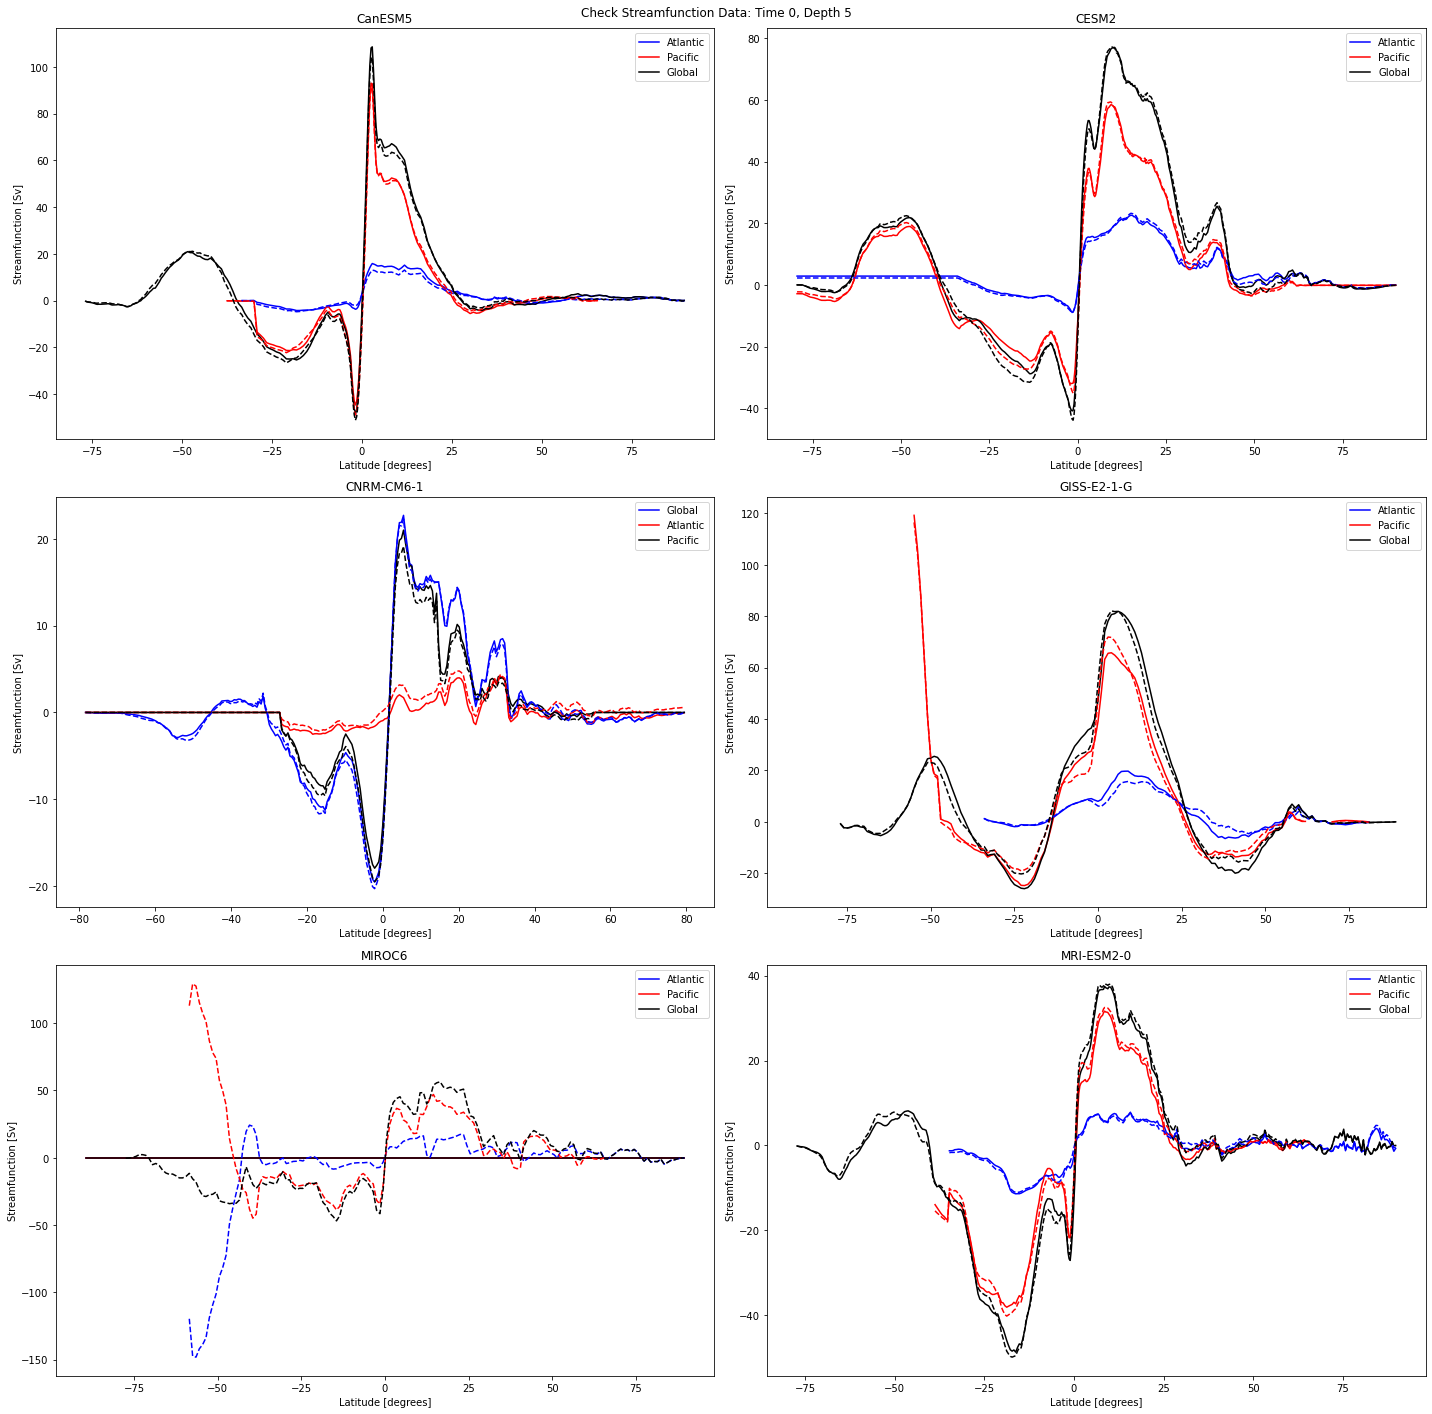

In [9]:
## Streamfunction over latitude at set level and time
# solid:  abrupt-2xCO2
# dashed: abrupt-4xCO2

# data[model][variable8][time, basin, level, latitude]
# print(data8_2x['CanESM5'][variable8])

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.set_figheight(20)
fig.set_figwidth(20)
fig.suptitle('Check Streamfunction Data: Time 0, Depth 5')

z = 5

for i, model in enumerate(model_list_msftmz):
    ax = axs[i]
    print(ax)
    
    if model in model_list:
        print(model)
        
        try: # MIROC6 missing abrupt-2xCO2 data
            data_2x = data3a_2x[model][variable3].values[0, :, z, :]
        except TypeError:
            data_2x = np.zeros(np.shape(data3a_4x[model][variable3].values[0, :, z, :]))
            
        data_4x = data3a_4x[model][variable3].values[0, :, z, :]
        lats = data3a_4x[model].lat.values
        print('data imported')
        
        ax.plot(lats, data_2x[0, :]/1e9, color='b')
        ax.plot(lats, data_2x[1, :]/1e9, color='r')
        ax.plot(lats, data_2x[2, :]/1e9, color='k')
        ax.legend(['Atlantic', 'Pacific', 'Global'])
        
        ax.plot(lats, data_4x[0, :]/1e9, color='b', linestyle='dashed')
        ax.plot(lats, data_4x[1, :]/1e9, color='r', linestyle='dashed')
        ax.plot(lats, data_4x[2, :]/1e9, color='k', linestyle='dashed')
        
        ax.set_title(model)
        ax.set_xlabel('Latitude [degrees]')
        ax.set_ylabel('Streamfunction [Sv]')
        print('done')
        
    if model in model_list2:
        print(model)
        
        if model == 'CNRM-CM6-1':
            data_2x = data4b_2x[model][variable4].values[0, :, z, :]
            data_4x = data4b_4x[model][variable4].values[0, :, z, :]
            jvals  = data4b_2x[model]['j-mean'].values
            jval_0 = jvals[-1]
            lats   = (jvals - (jval_0/2)) * (80 / (jval_0/2)) # convert j-mean to latitude 
            handles = ['Global', 'Atlantic', 'Pacific']
        
        else:
            data_2x = data3b_2x[model][variable3].values[0, :, z, :]
            data_4x = data3b_4x[model][variable3].values[0, :, z, :]
            lats = data3b_2x[model].lat.values
            handles = ['Atlantic', 'Pacific', 'Global']
            
        print('data imported')
        
        ax.plot(lats, data_2x[0, :]/1e9, color='b')
        ax.plot(lats, data_2x[1, :]/1e9, color='r')
        ax.plot(lats, data_2x[2, :]/1e9, color='k')
        ax.legend(handles)
        
        ax.plot(lats, data_4x[0, :]/1e9, color='b', linestyle='dashed')
        ax.plot(lats, data_4x[1, :]/1e9, color='r', linestyle='dashed')
        ax.plot(lats, data_4x[2, :]/1e9, color='k', linestyle='dashed')
        ax.set_title(model)
        ax.set_xlabel('Latitude [degrees]')
        ax.set_ylabel('Streamfunction [Sv]')
        print('done')
        
plt.tight_layout()
## what is j-mean, and is my conversion to latitude correct? ##

In [10]:
# Index at which 500m occurs

depth_index = {'CESM2': 33,
               'CanESM5': 20,
               'GISS-E2-1-G': 17,
               'MRI-ESM2-0': 34,
               'CNRM-CM6-1': 40,
               'MIROC6': 32}

for i, model in enumerate(model_list_msftmz):
    depth = depth_index[model]
    
    if model == 'CNRM-CM6-1':
        print(model)
        print(data4b_4x[model][variable4].lev.units)
        print(data4b_4x[model][variable4].lev[depth:].values)
    elif model in model_list2:
        print(model)
        print(data3b_4x[model][variable3].lev.units)
        print(data3b_4x[model][variable3].lev[depth:].values)
    elif model in model_list:
        print(model)
        print(data3a_4x[model][variable3].lev.units)
        print(data3a_4x[model][variable3].lev[depth:].values)


CanESM5
m
[ 579.35009766  679.61657715  793.2019043   920.45617676 1061.4005127
 1215.72509766 1382.81848145 1561.82202148 1751.7010498  1951.31860352
 2159.50585938 2375.11938477 2597.08203125 2824.41186523 3056.23461914
 3291.78808594 3530.41894531 3771.57397461 4014.78955078 4259.68115234
 4505.93261719 4753.28320312 5001.52197266 5250.47607422 5500.00634766]
CESM2
centimeters
[ 50370.6875      55174.91015625  60699.66796875  67072.859375
  74439.8046875   82960.6953125   92804.3515625  104136.8203125
 117104.015625   131809.359375   148290.078125   166499.203125
 186301.4375     207487.390625   229803.90625    252990.40625
 276809.84375    301067.0625     325613.84375    350344.875
 375189.1875     400101.15625    425052.46875    450026.0625
 475012.         500004.6875     525000.9375     549999.0625    ]
CNRM-CM6-1
m
[ 536.233187    595.87209002  661.8052163   734.43215547  814.10568045
  901.11799711  995.68851219 1097.95414689 1207.96307315 1325.67246727
 1450.9504993  1583.582

In [11]:
### AMOC Strength part 1 / 2 ###
# Max streamfunction, north of 30 degrees, deeper than 500m (Lin et. al. 2019)
### ------------ ###

## Find 30N and 500m depth indexes ##

# Latitude Index Search Function #
def find_latitude(model, latitude, values):
    d_lat = np.mean(np.diff(values))
    
    for i, lat in enumerate(values):
        if (lat < latitude + d_lat) and (lat > latitude - d_lat):
            return i, lat
# end function

latitude = 30 # North

for i, model in enumerate(model_list_msftmz):
    #print(model)
    
    if model == 'CNRM-CM6-1':
        jvals1 = data4b_2x[model]['j-mean'].values
        jvals2 = data4b_4x[model]['j-mean'].values
        jval_0 = jvals1[-1]
        values1 = (jvals1 - (jval_0/2)) * (80 / (jval_0/2)) # convert j-mean to latitude 
        values2 = (jvals2 - (jval_0/2)) * (80 / (jval_0/2)) # convert j-mean to latitude 
    
    elif model in model_list:
        try: # MIROC6 missing abrupt-2xCO2
            values1 = data3a_2x[model].lat.values
        except:
            values1 = data3a_4x[model].lat.values
        values2 = data3a_4x[model].lat.values
        
    elif model in model_list2:
        values1 = data3b_2x[model].lat.values
        values2 = data3b_4x[model].lat.values
        
    index1, lat1 = find_latitude(model, latitude, values1)
    index2, lat2 = find_latitude(model, latitude, values2)
        
    print('%s: %d, %d, %f, %f' % (model, index1, index2, lat1, lat2))
# end loop

CanESM5: 192, 192, 30.036411, 30.036411
CESM2: 281, 281, 29.815315, 29.815315
CNRM-CM6-1: 201, 201, 29.931974, 29.931974
GISS-E2-1-G: 120, 120, 30.000000, 30.000000
MIROC6: 119, 119, 29.500000, 29.500000
MRI-ESM2-0: 241, 241, 29.750000, 29.750000


In [12]:
### AMOC Strength  part 2 / 2 ###
# Max streamfunction, north of 30 degrees, deeper than 500m (Lin et. al. 2019)
### ------------ ###

# Index cooresponding to 30N and 50m depth
North30_index = {'CESM2': 281,
                 'CanESM5': 192,
                 'GISS-E2-1-G': 120,
                 'MRI-ESM2-0': 241,
                 'CNRM-CM6-1': 201,
                 'MIROC6': 119}

depth_index = {'CESM2': 33,
               'CanESM5': 20,
               'GISS-E2-1-G': 17,
               'MRI-ESM2-0': 34,
               'CNRM-CM6-1': 40,
               'MIROC6': 32}
        

### ------------ ###

## Define AMOC Strength ##

# data size:
# time: 1800, basin: 3, lev: 45, lat: 290

# Chunk AMOC streamfunction data #
#def find_AMOC_strength(model, msftmz, time_values):
#    North30 = North30_index[model]
#    basin = 0 # Atlantic
#    depth = depth_index[model]
#    AMOC_strength = []
#    
#    for time in time_values:
#        AMOC_strength.append(np.max(msftmz[time, basin, depth:, North30:]))
#        
#    return np.array(AMOC_strength)
# end function

# store AMOC streanfuction values #

AMOC_strength_pi = {}
AMOC_strength_2x = {} 
AMOC_strength_4x = {}

## Plot of AMOC Strength for each model ##

for i, model in enumerate(model_list_msftmz):
    # time values
    basin = 0
    time_pi = range(0, 100)
    time    = range(0, 150)
    
    # model constants
    depth   = depth_index[model]
    north30 = North30_index[model]
    
    ## Import Preindustrial ##
    
    # missing preindustrial data for GISS
    if model == 'GISS-E2-1-G':
        values_pi_mean = 0
        
    # only has msftyz
    elif model == 'CNRM-CM6-1':
        #values_pi = data4b_pi[model][variable4][-100*12:, :, :, :].fillna(0).values
        values_pi_mean = data4b_pi[model][variable4][-100*12:, :, :, :].fillna(0).mean().values
        
    # mean of the last 100 years, msftmz
    else:
        if model in model_list:
            #values_pi = data3a_pi[model][variable3][-100*12:, :, :, :].fillna(0).values
            values_pi_mean = data3a_pi[model][variable3][-100*12:, :, :, :].fillna(0).mean().values
            
        elif model in model_list2:
            #values_pi = data3b_pi[model][variable3][-100*12:, :, :, :].fillna(0).values
            values_pi_mean = data3b_pi[model][variable3][-100*12:, :, :, :].fillna(0).mean().values
    
    ## Import Streamfunction Data ##
    if model in model_list:
        try: # MIROC6 missing abrupt-2xCO2
            msftmz_2x = data3a_2x[model][variable3][:, 0, depth:, north30:].resample(time='1Y').mean(dim="time") - values_pi_mean
        except:
            msftmz_2x = np.zeros(np.shape(data3a_4x[model][variable3][:, 0, depth:, north30:].resample(time='1Y').mean(dim="time")))
          
        msftmz_pi = data3a_pi[model][variable3][-100*12:, 0, depth:, north30:].resample(time='1Y').mean(dim='time')
        msftmz_4x = data3a_4x[model][variable3][:, 0, depth:, north30:].resample(time='1Y').mean(dim="time") - values_pi_mean
        
    elif model in model_list2:
        if model == 'CNRM-CM6-1':
            # Remember: atlantic basin in CNRM-CM6-1 is indexed at 1, not 0
            msftmz_2x = data4b_2x[model][variable4][:, 1, depth:, north30:].resample(time='1Y').mean(dim="time") - values_pi_mean
            msftmz_4x = data4b_4x[model][variable4][:, 1, depth:, north30:].resample(time='1Y').mean(dim="time") - values_pi_mean
            msftmz_pi = data4b_pi[model][variable4][-100*12:, 1, depth:, north30:].resample(time='1Y').mean(dim="time")
           
        elif model == 'GISS-E2-1-G':
            msftmz_pi = np.zeros(np.shape(msftmz_pi))
            msftmz_2x = data3b_2x[model][variable3][:, 0, depth:, north30:].resample(time='1Y').mean(dim="time") - values_pi_mean
            msftmz_4x = data3b_4x[model][variable3][:, 0, depth:, north30:].resample(time='1Y').mean(dim="time") - values_pi_mean
        else:
            msftmz_2x = data3b_2x[model][variable3][:, 0, depth:, north30:].resample(time='1Y').mean(dim="time") - values_pi_mean
            msftmz_4x = data3b_4x[model][variable3][:, 0, depth:, north30:].resample(time='1Y').mean(dim="time") - values_pi_mean
            msftmz_pi = data3b_pi[model][variable3][-100*12:, 0, depth:, north30:].resample(time='1Y').mean(dim='time')
    
    print(np.shape(msftmz_2x))
    print(np.shape(msftmz_4x))
    
    # Find Max Atlantic Streamfunction vs Time
    AMOC_values_2x = np.amax(np.amax(msftmz_2x[:, :, :], 1), 1)
    AMOC_values_4x = np.amax(np.amax(msftmz_4x[:, :, :], 1), 1)
    
    AMOC_strength_2x[model] = AMOC_values_2x[0:150]
    AMOC_strength_4x[model] = AMOC_values_4x[0:150]
    
    AMOC_values_pi = np.amax(np.amax(msftmz_pi[:, :, :], 1), 1)
    AMOC_strength_pi[model] = AMOC_values_pi[0:150]
        
    print(np.shape(AMOC_values_2x), np.shape(AMOC_values_4x), np.shape(AMOC_values_pi))
    print('done', model)
# end loop

## save data
amoc_strength_data_2x = pandas.DataFrame(AMOC_strength_2x)
amoc_strength_data_4x = pandas.DataFrame(AMOC_strength_4x)
amoc_strength_data_pi = pandas.DataFrame(AMOC_strength_pi)
amoc_strength_data_2x.to_csv('AMOC_strength_2x.csv')
amoc_strength_data_4x.to_csv('AMOC_strength_4x.csv')
amoc_strength_data_pi.to_csv('AMOC_strength_pi.csv')

(150, 25, 98)
(151, 25, 98)
(150,) (151,) (100,)
done CanESM5
(150, 28, 114)
(999, 28, 114)
(150,) (999,) (100,)
done CESM2
(150, 35, 93)
(150, 35, 93)
(150,) (150,) (100,)
done CNRM-CM6-1
(151, 23, 60)
(151, 23, 60)
(151,) (151,) (100,)
done GISS-E2-1-G
(250, 29, 61)
(250, 29, 61)
(250,) (250,) (100,)
done MIROC6
(151, 27, 121)
(151, 27, 121)
(151,) (151,) (100,)
done MRI-ESM2-0


/usr/lib/python3/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/lib/python3/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/lib/python3/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/lib/python3/dist-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/usr/lib/python3/dist-packages/dask/utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/usr/lib/python3/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/lib/python3/dist-packages/dask/utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/usr/lib/python3/dist-packages/toolz/functoolz.py:46

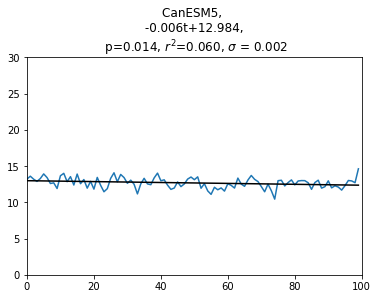

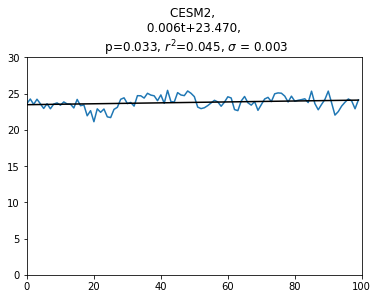

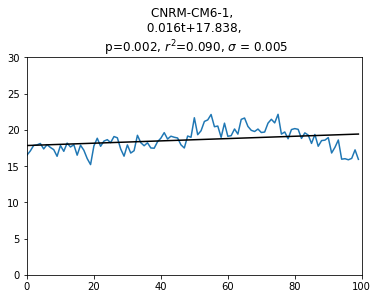

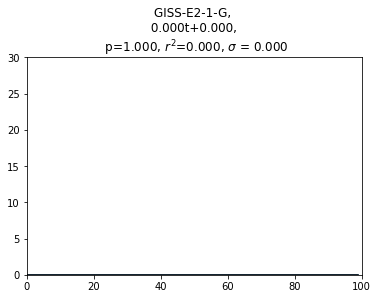

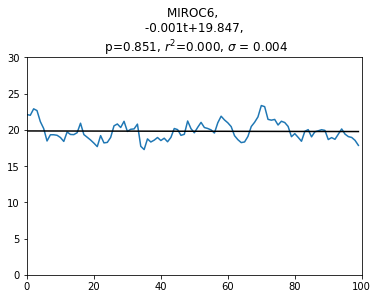

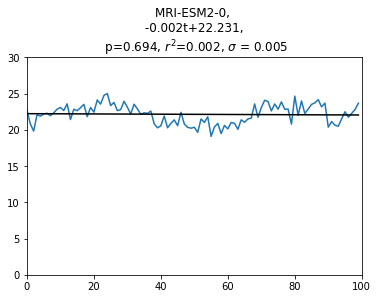

In [33]:
for model in model_list_msftmz:
    plt.figure()
    m, b, r, p, stderr = linregress(np.arange(100), AMOC_strength_pi[model]/1e9)
    plt.plot(AMOC_strength_pi[model]/1e9)
    plt.plot(np.arange(100), m*np.arange(100)+b, color='k')
    plt.title('%s, \n %.3ft+%.3f, \n p=%.3f, $r^2$=%.3f, $\\sigma$ = %.3f' % (model, m, b, p, r**2, stderr))
    plt.xlim(0, 100)
    plt.ylim(0, 30)
    
## drift:
## CanESM5:     -0.006 Sv/yr or -0.6 Sv/century, ~ 4.0% of initial AMOC anomaly
## CESM2:        0.006 Sv/yr or  0.6 Sv/century, ~ 2.7% of initial AMOC anomaly
## CNRM-CM6-1:   0.016 Sv/yr or  1.6 Sv/century, ~ 9.4% of initial AMOC anomaly
## MIROC6:      -0.001 Sv/yr or -0.1 Sv/century, ~ 0.6% of initial AMOC anomaly
## MRI-ESM2-0:  -0.002 Sv/yr or -0.2 Sv/century, ~ 1.0% of initial AMOC anomaly
### Only CNRM-CM6-1 has significant drift

### We checked if preindustrial control streamfunction data has drift by looking for a linear trend in 
### preindustrial AMOC strength. Five of our GCMs have available piControl streamfunction data. 
### Of these five models, We found the average magnitude of the piControl slope was 0.62 Sv/century.
### The average change over 100 years of preindustrial control is between 0.6% and 9.4% of the initial 
### AMOC strength anomaly, where only CNRM-CM6-1 is over 4%. Taking a look at the piControl time series for the final 
### 100 years, CNRM-CM6-1 has a positive trend until year 80 where there is a singificant negative trend. CNRM-CM6-1 has 
### a correlation coefficient of 0.09. 3 GCMs have p-values less than 5%, whereas MRI-ESM2-0 and MIROC6 do not 
### have a statistically significant trend. Given these results, we chose to subtract a constant piControl value from
### the AMOC strength calculations.

In [18]:
### Difference between picontrol value and final 30 years of AMOC strength

import warnings
warnings.filterwarnings("ignore")
print('model \t', 'pi \t', 'pi - 2x \t', 'pi - 4x \t', 'ratio')

for model in model_list_msftmz:
    if model == 'GISS-E2-1-G':
        pi = 14.88
        x4 = np.mean(AMOC_strength_4x[model][-20:].values/1.03e9)
        x2 = np.mean(AMOC_strength_2x[model][-20:].values/1.03e9)
        print(model, pi, pi -x2, pi - x4, (pi -x2)/(pi - x4))
        
    elif model == 'MIROC6':
        pi = np.mean(AMOC_strength_pi[model].values/1.03e9)
        x4 = np.mean(AMOC_strength_4x[model][-20:].values/1.03e9)
        print(model, pi, pi - x4)
        
    else:
        pi = np.mean(AMOC_strength_pi[model].values/1.03e9)
        x4 = np.mean(AMOC_strength_4x[model][-20:].values/1.03e9)
        x2 = np.mean(AMOC_strength_2x[model][-20:].values/1.03e9)
    
        print(model, pi, pi -x2, pi - x4, (pi -x2)/(pi - x4))

model 	 pi 	 pi - 2x 	 pi - 4x 	 ratio
CanESM5 12.3063 3.0343313 7.9840283 0.38005018
CESM2 23.092592 15.236543 20.87432 0.72991806
CNRM-CM6-1 18.084934 10.216082 16.287973 0.6272163
GISS-E2-1-G 14.88 -9.337176437377929 12.191723232269288 -0.765861909714626
MIROC6 19.229166 15.670503
MRI-ESM2-0 21.495337 19.158224 20.270351 0.9451353


CanESM5: 2.289669, 6.894992, 1.157827
CESM2: 11.330188, 16.677317, -2.991530
CNRM-CM6-1: 7.166101, 12.894974, -0.718614
21.95309
GISS-E2-1-G: -1.468416, 19.350685, 11.143759
MIROC6: 0.000000, 12.574496, 6.287248
MRI-ESM2-0: 16.368448, 15.630384, -8.553256


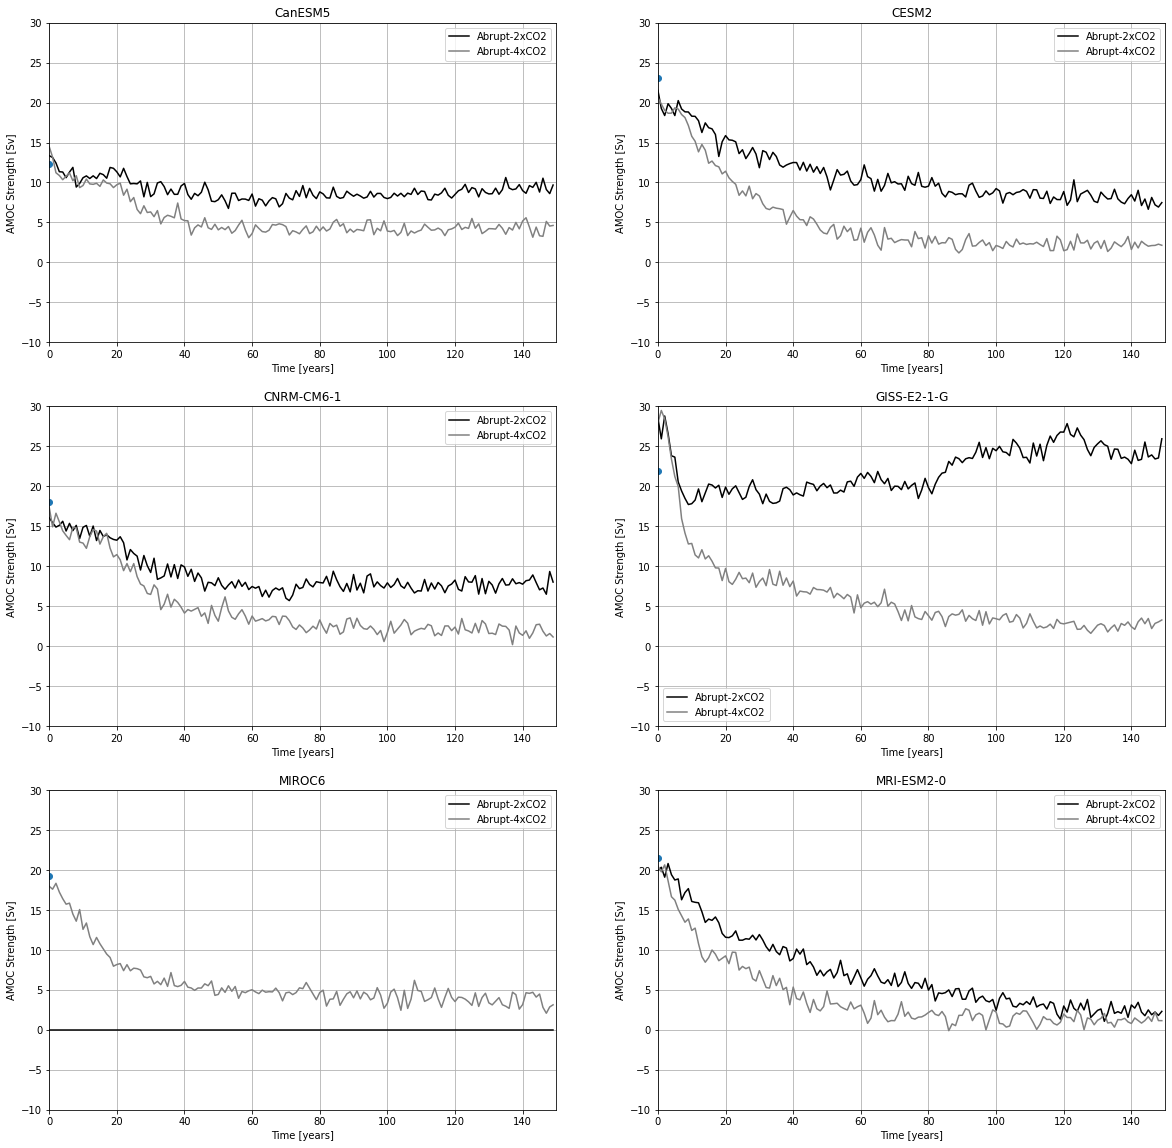

In [76]:
# AMOC Strength vs. Time #
## check giss values


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.set_figheight(20)
fig.set_figwidth(20)

time = np.arange(0, 150)
#print(AMOC_strength_pi)

for i, model in enumerate(model_list_msftmz):
    ax = axs[i]
    ax.plot(time, AMOC_strength_2x[model]/1.03e9, color='k')
    ax.plot(time, AMOC_strength_4x[model]/1.03e9, color='gray')
    ax.legend(['Abrupt-2xCO2', 'Abrupt-4xCO2'])
    ax.set_xlim([0, 150])
    ax.set_ylim([-10, 30])
    ax.grid()
    ax.set_xlabel('Time [years]')
    ax.set_ylabel('AMOC Strength [Sv]')
    ax.set_title(model)
    
    initial = AMOC_strength_pi[model]
    # Decline = picontrol - last decade
    decline_2x = (np.mean(AMOC_strength_2x[model][0:10]) - np.mean(AMOC_strength_2x[model][-30:]))/(1.03e9)
    decline_4x = (np.mean(AMOC_strength_4x[model][0:10]) - np.mean(AMOC_strength_4x[model][-30:]))/(1.03e9)
    
    if model == 'GISS-E2-1-G':
        ax.plot(0, np.mean(AMOC_strength_4x[model][:10]/1.03e9), 'o')
        print(np.mean(AMOC_strength_4x[model].values[:10]/1.03e9))
    else:
        ax.plot(0, np.mean(AMOC_strength_pi[model].values/1.03e9), 'o')
    
    # Model: decline_2x, decline_4x/2
    print('%s: %f, %f, %f' % (model, decline_2x, decline_4x, decline_4x/2 - decline_2x))
    
plt.savefig('AMOC_strength.png')

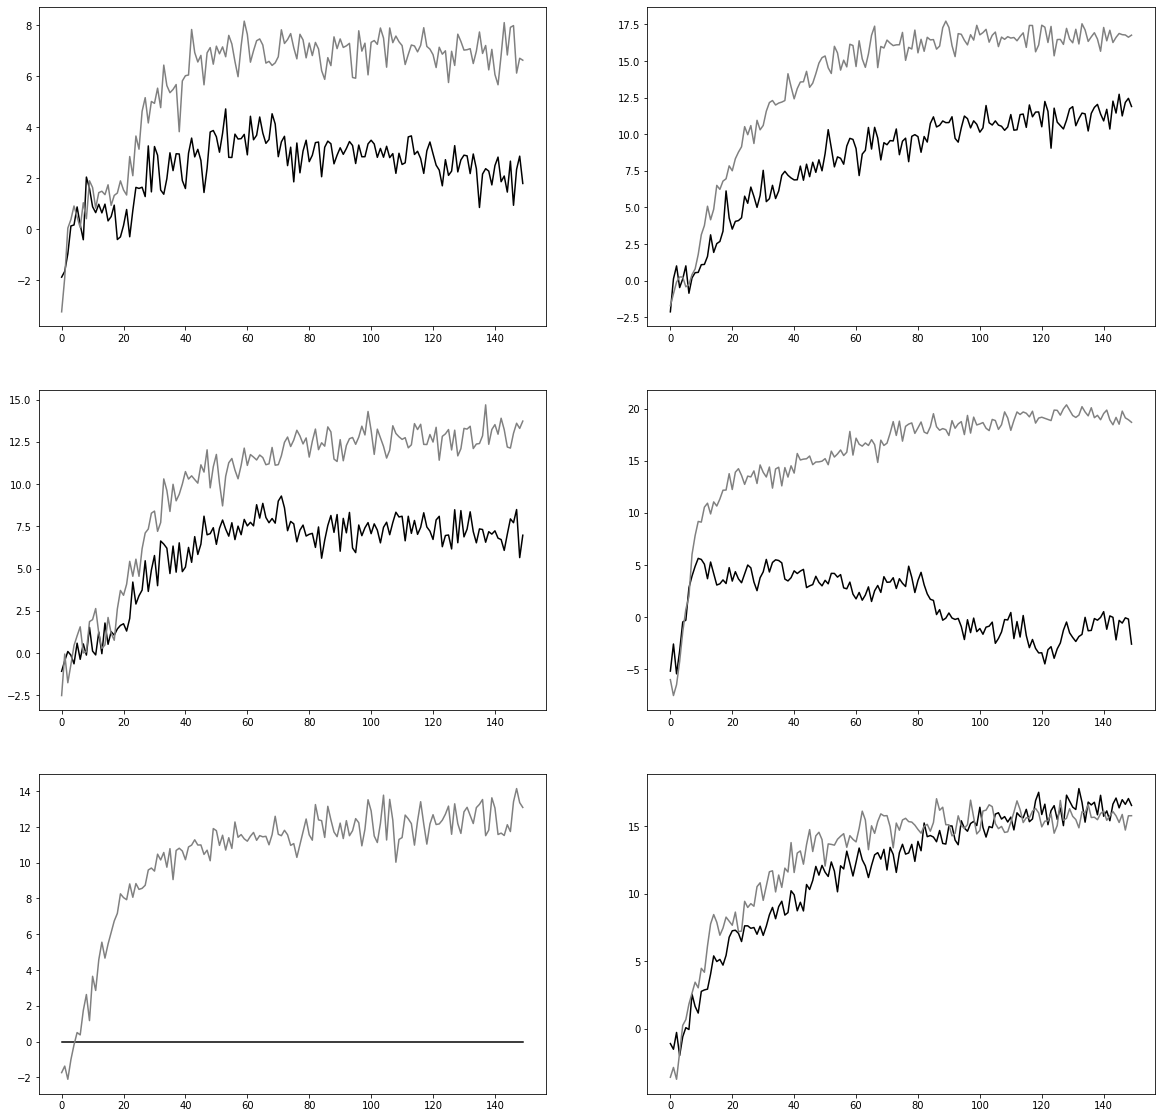

In [19]:
AMOC_decline_2x = {} 
AMOC_decline_4x = {}

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.set_figheight(20)
fig.set_figwidth(20)

time = np.arange(0, 150)

for i, model in enumerate(model_list_msftmz):
    ax = axs[i]
    
    initial2 = np.mean(AMOC_strength_2x[model][0:10])
    difference2 = AMOC_strength_2x[model] - initial2
    AMOC_decline_2x[model] = -1*difference2
    
    initial4 = np.mean(AMOC_strength_4x[model][0:10])
    difference4 = AMOC_strength_4x[model] - initial4
    AMOC_decline_4x[model] = -1*difference4
    
    
decline_data_2x = pandas.DataFrame(AMOC_decline_2x)
decline_data_4x = pandas.DataFrame(AMOC_decline_4x)
decline_data_2x.to_csv('AMOC_decline_2x.csv')
decline_data_4x.to_csv('AMOC_decline_4x.csv')

abrupt-4xCO2: y = 1.554710 x + -3.521535, r=0.760231, p=0.079342, std=0.664286
abrupt-2xCO2: y = 1.834440 x + -8.393005, r=0.360380, p=0.639620, std=3.357519


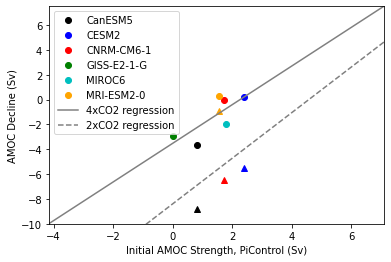

In [37]:
## Scatter: AMOC Initial vs Decline

fig = plt.figure(1)

colors = ['k', 'b', 'r', 'g', 'c', 'orange']
xvals_4x = []
yvals_4x = []
xvals_2x = []
yvals_2x = []

for i, model in enumerate(model_list_msftmz):
    
    # Decline = average AMOC strength from first twenty years - last twenty years
    initial = AMOC_strength_pi[model]/(1e9)
    decline_2x = initial - (np.mean(AMOC_strength_2x[model][-10:])/(1e9))
    decline_4x = initial - (np.mean(AMOC_strength_4x[model][-10:])/(1e9))

    
    if model == 'MIROC6':
        p1 = plt.plot(initial, decline_4x, 'o', color=colors[i], label=model)
        xvals_4x.append(float(initial))
        yvals_4x.append(float(decline_4x))
        
    else:
        p1 = plt.plot(initial, decline_2x, '^', color=colors[i])
        p2 = plt.plot(initial, decline_4x, 'o', color=colors[i], label=model)
        xvals_4x.append(float(initial))
        yvals_4x.append(float(decline_4x))
        if model != 'GISS-E2-1-G':
            xvals_2x.append(float(initial))
            yvals_2x.append(float(decline_2x))
    
    plt.xlim([-4.15, 7.1])
    plt.ylim([-10, 7.5])
    plt.xlabel('Initial AMOC Strength, PiControl (Sv)')
    plt.ylabel('AMOC Decline (Sv)')

# regression of 4x scatter
slope4, intercept4, r4, p4, std4 = linregress(xvals_4x, yvals_4x)
slope2, intercept2, r2, p2, std2 = linregress(xvals_2x, yvals_2x)

plt.plot(np.arange(-30, 30), slope4*np.arange(-30, 30)+intercept4, color='gray', 
         linestyle='solid', label='4xCO2 regression')
plt.plot(np.arange(-30, 30), slope2*np.arange(-30, 30)+intercept2, color='gray', 
         linestyle='dashed', label='2xCO2 regression')

plt.legend()
#plt.legend(points, handles, numpoints=6, handler_map={tuple: HandlerTuple(ndivide=None)})

print('abrupt-4xCO2: y = %f x + %f, r=%f, p=%f, std=%f' % (slope4, intercept4, r4, p4, std4))
print('abrupt-2xCO2: y = %f x + %f, r=%f, p=%f, std=%f' % (slope2, intercept2, r2, p2, std2))

plt.savefig('AMOC_scatter.png')

# 2x regression excludes Giss-G because it has no decline, and MIROC6 for lack of data

In [ ]:
## Scatter: AMOC decline 2x vs 4x

fig = plt.figure(1)
#fig.set_figheight(20)
#fig.set_figwidth(20)

time = np.arange(0, 150)

colors = ['k', 'b', 'r', 'g', 'y', 'c']

for i, model in enumerate(model_list_msftmz):
    if model == 'MIROC6':
        continue
    
    # Decline = average AMOC strength from first twenty years - last twenty years
    decline_2x = (np.mean(AMOC_strength_2x[model][0:5]) - np.mean(AMOC_strength_2x[model][-5:]))/(1e9)
    decline_4x = (np.mean(AMOC_strength_4x[model][0:5]) - np.mean(AMOC_strength_4x[model][-5:]))/(1e9)
    initial_2x = np.mean(AMOC_strength_2x[model][0:5])/(1e9)
    initial_4x = np.mean(AMOC_strength_4x[model][0:5])/(1e9)
    
    plt.plot(decline_4x, decline_2x, 'o', color=colors[i], label=model)
    plt.xlabel('AMOC Decline Abrupt-4xCO2')
    plt.ylabel('AMOC Decline Abrupt-2xCO2')
    plt.xlim([-5, 20])
    plt.ylim([-5, 20])
    plt.legend()

In [ ]:
## Scatter: AMOC decline difference vs AMOC initial

fig = plt.figure(1)
#fig.set_figheight(20)
#fig.set_figwidth(20)

time = np.arange(0, 150)

colors = ['k', 'b', 'r', 'g', 'y', 'c']

for i, model in enumerate(model_list_msftmz):
    if model == 'MIROC6':
        continue
    
    # Decline = average AMOC strength from first twenty years - last twenty years
    decline_2x = (np.mean(AMOC_strength_2x[model][0:10]) - np.mean(AMOC_strength_2x[model][-10:]))/(1e9)
    decline_4x = (np.mean(AMOC_strength_4x[model][0:10]) - np.mean(AMOC_strength_4x[model][-10:]))/(1e9)
    decline_diff = decline_2x - (decline_4x/2)
    
    initial_2x = np.mean(AMOC_strength_2x[model][0:10])/(1e9)
    initial_4x = np.mean(AMOC_strength_4x[model][0:10])/(1e9)
    initial = np.mean([initial_2x, initial_4x])
    
    plt.plot(initial, decline_diff, 'o', color=colors[i], label=model)
    #plt.xlim([-5, 30])
    #plt.ylim([-5, 30])
    plt.xlabel('Initial AMOC Strength (mean years 1 to 5)')
    plt.ylabel('AMOC Decline Difference')
    plt.legend()